## Importing Libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

In [45]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


## Reading CSV file

In [2]:
df = pd.read_csv("IMDB Dataset.csv")


### Looking at the dataset using the head method

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Knowing the shape of the dataset

In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Using a countplot we see that number of postive and negative reviews are almost equal

Text(0.5, 1.0, 'Sentiment distribution')

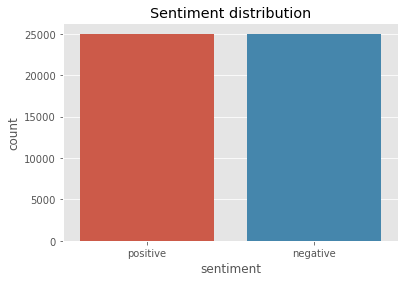

In [6]:
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment distribution")

### Reading the first 5 reviews

In [7]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [8]:
def no_of_words(text):
    words = text.split()
    return len(words)



In [9]:
df['word count'] = df['review'].apply(no_of_words)


### we add another column to the dataset which represents the word count of the reviews

In [10]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


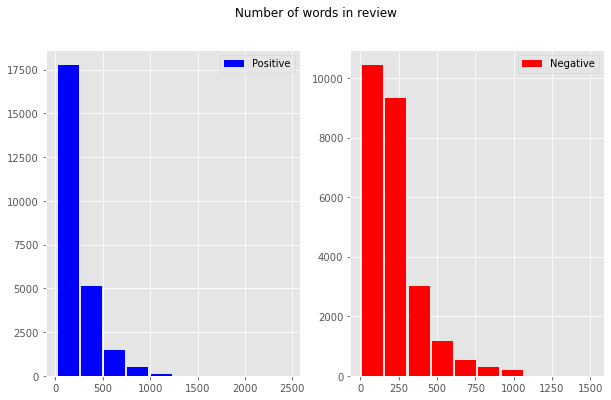

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df["sentiment"] == "positive"]['word count'], label = 'Positive', color = 'blue', rwidth = 0.9);
ax[0].legend(loc="upper right");
ax[1].hist(df[df["sentiment"] == "negative"]['word count'], label = 'Negative', color = 'red', rwidth = 0.9);
ax[1].legend(loc="upper right");
fig.suptitle("Number of words in review")
plt.show()

### Plotting a histogram to know the distribution of positive and negative word count

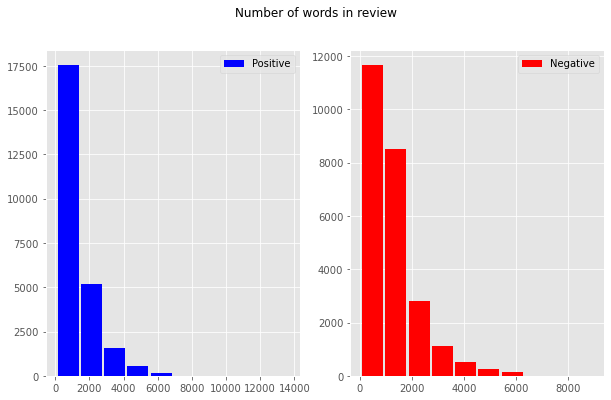

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df["sentiment"] == "positive"]['review'].str.len(), label = 'Positive', color = 'blue', rwidth = 0.9);
ax[0].legend(loc="upper right");
ax[1].hist(df[df["sentiment"] == "negative"]['review'].str.len(), label = 'Negative', color = 'red', rwidth = 0.9);
ax[1].legend(loc="upper right");
fig.suptitle("Number of words in review")
plt.show()

### Converting categorical values to numerical data

In [13]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)


In [14]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


## Text Processing

### We convert all the text to lowercase, remove all the HTML tags if any, remove puncuation and all stop words in english. We finally return the filtered text

In [15]:
def data_processing(text):
    text = text.lower()
    text = re.sub("<br />", '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df.review = df['review'].apply(data_processing)

In [17]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)


Number of duplicate entries:  421


### Dropping the duplicate values

In [18]:
df = df.drop_duplicates('review')

## Stemming

### Using Porter Stemmer() we perform stemming, which signifcantly reduces the word count

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df.review = df['review'].apply(lambda x: stemming(x))

In [21]:
df['word count'] = df['review'].apply(no_of_words)


In [22]:
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [23]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


### Plotting a wordcloud to understand the frequency of positive words

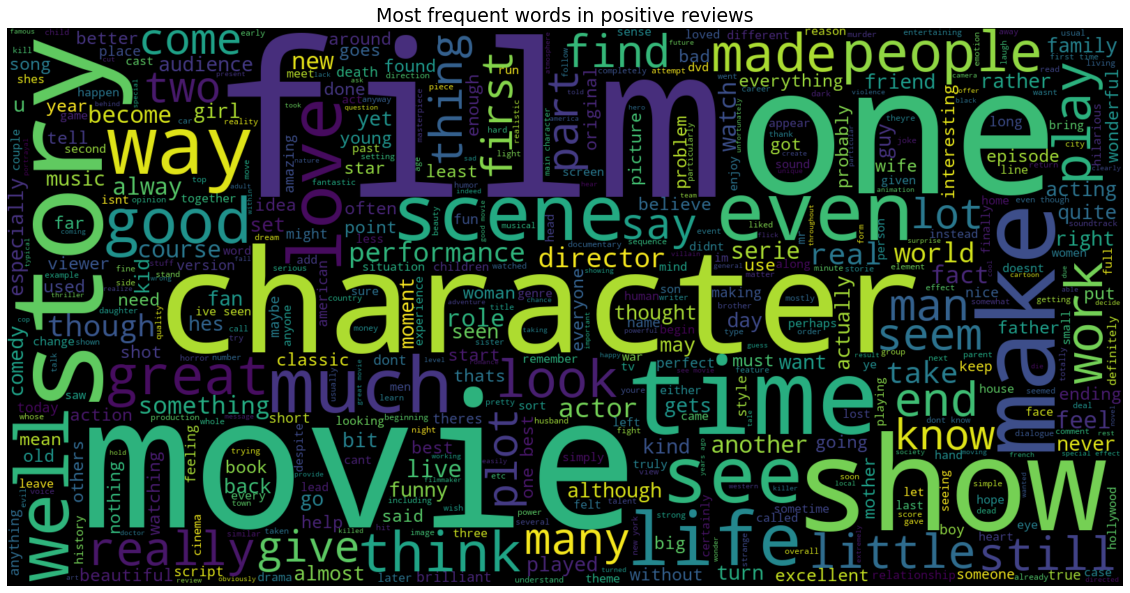

In [24]:
text = " ".join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in positive reviews", fontsize = 19)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281
5,great,12568
6,story,12338
7,see,11814
8,time,11724
9,well,10930


### Plotting a barplot to show the word count of the most frequently used positive words

In [46]:
fig = px.bar(pos_words, x = 'count', y="word", title = "Common words in positive reviews", color='word')
import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

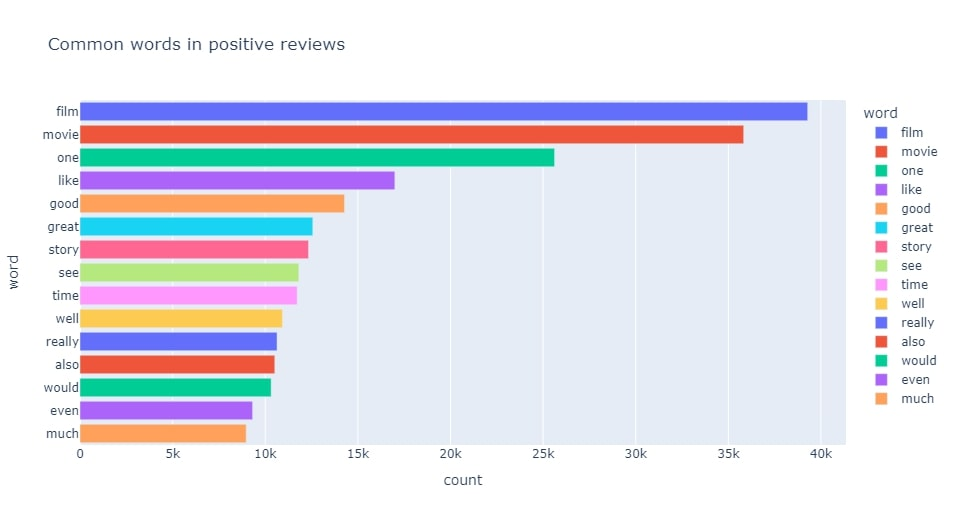

In [28]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


### Plotting a wordcloud to understand the frequency of negitive words

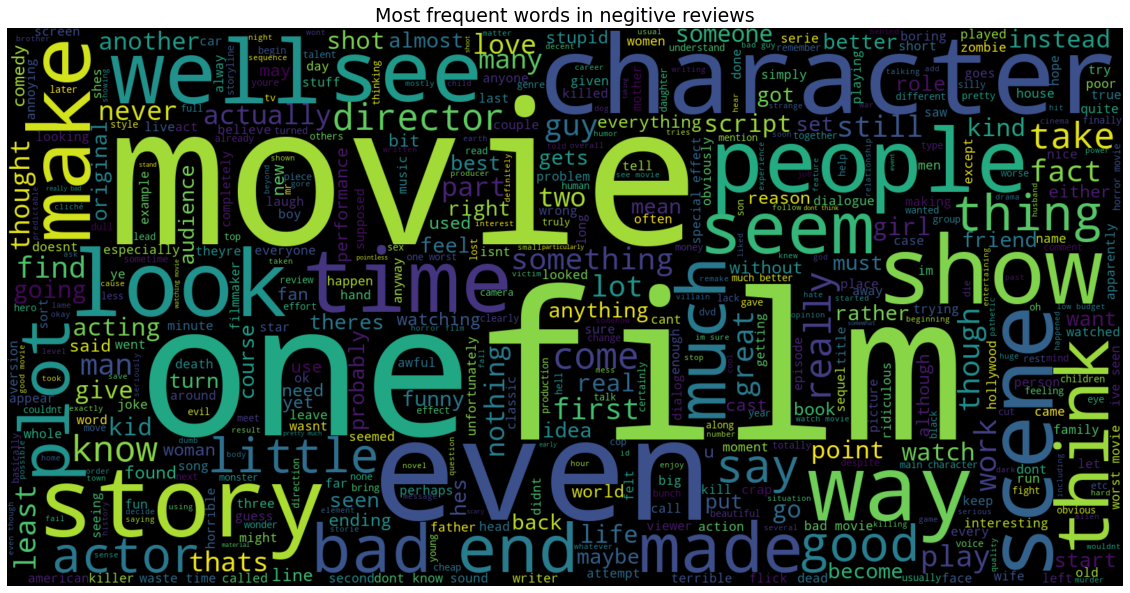

In [29]:
text = " ".join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in negitive reviews", fontsize = 19)
plt.show()

In [30]:

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759
5,good,13995
6,bad,13903
7,would,13482
8,really,12084
9,time,11349


### Plotting a barplot to show the word count of the most frequently used negitive words

In [47]:
fig = px.bar(neg_words, x = 'count', y="word", title = "Common words in negitive reviews", color='word')
import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

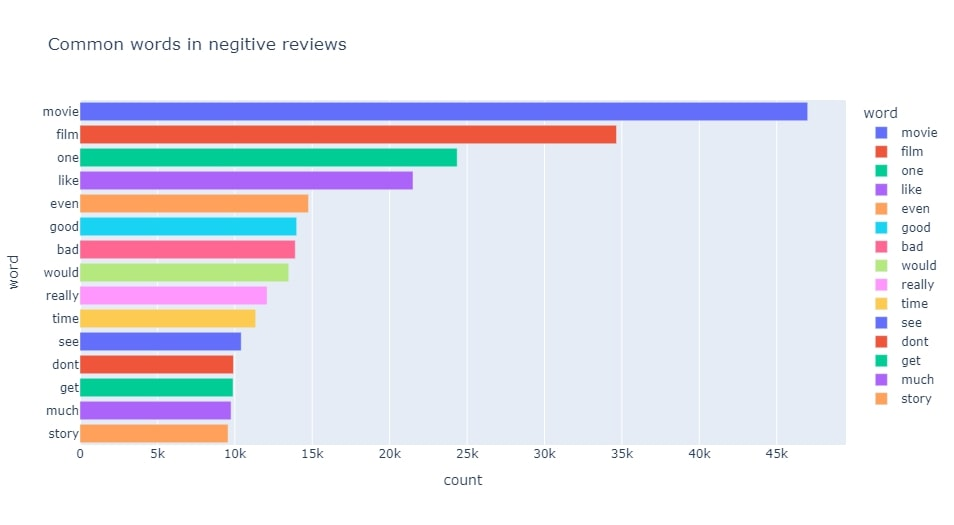

In [33]:
X = df['review']
Y = df['sentiment']


### Vectorizing the data using Tfidf Vectorizer

In [35]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

### Splitting the data into train data and test data with test size = 30%

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


# Training the ML Model 

### Since, this is a classification problem where we need to predict if a given review falls under positive or negative, we can use any of the three supervised models (Logistic Regression, Multinomial NaiveBayes and Support Vector Machine) and see which one gives the best accuracy.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Fitting, training and testing a Logistic Regression model 

In [73]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.99%


In [75]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6453  908]
 [ 729 6784]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



## Fitting, training and testing a Multinomial NaiveBayes Model 

In [76]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [77]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6418  943]
 [1074 6439]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



## Fitting, training and testing a Support Vector Machine 

In [80]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


In [81]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### we see that out of the three, SVC gave the best accuracy of 89.22%. So we can try optimizing the model to improve its accuracy. So let's apply hyperparameter tuning to find the best parameters that will most likely give a better accuracy.

## Hyperparameter Tuning using GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 2/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 3/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 4/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 5/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 1/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 2/5] END ......................C=0.1, loss=squared_hinge; total time=   0.3s
[CV 3/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 4/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 5/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 1/5] END ................................C=1, loss=hinge; total time=   0.6s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [83]:
print("best cross validation score: {: .2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)


best cross validation score:  0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


### We see that after applying the best parameters, we get an improved accuracy of 89.41%

In [84]:
svc = LinearSVC(C = 1, loss= 'hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [85]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [86]:
models = ['Logistic Regression', "Multinomial NB", "Linear SVC", "Tuned Linear SVC"]
Accuracy = ['89.00%', '86.44%', '89.22%', "89.41%"]


### Printing all the trained models and their accuracy in a tabular format using prettytable
### The best achieved accuarcy = 89.41% using tuned linear SVC model

In [95]:
from prettytable import PrettyTable
myTable = PrettyTable(["Models", "Accuracy"])
  
# Add rows
myTable.add_row(["Logistic Regression", "89.00%"])
myTable.add_row(["Multinomial NB", "86.44%"])
myTable.add_row(["Linear SVC", "89.22%"])
myTable.add_row(["Tuned Linear SVC", "89.41%"])
print(myTable)

+---------------------+----------+
|        Models       | Accuracy |
+---------------------+----------+
| Logistic Regression |  89.00%  |
|    Multinomial NB   |  86.44%  |
|      Linear SVC     |  89.22%  |
|   Tuned Linear SVC  |  89.41%  |
+---------------------+----------+
